RBFN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('bank-full.csv',sep=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
col_to_use = ['age','balance','day','duration','campaign','pdays','previous']
data = dataset.drop(col_to_use,axis=1)

In [ ]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
data = data.apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [ ]:
data['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [ ]:
dataset['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data_rest = dataset[col_to_use]
data_rest.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
dataset2 = pd.concat([data_rest,data],axis=1)

In [ ]:
dataset2.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [ ]:
X= dataset2.drop('y',axis=1)
y= dataset2['y']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.33, random_state= 4)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 3.39736083, -0.45852779,  0.14087303, ..., -0.71332324,
        -1.50513854,  0.44672656],
       [-0.27605947,  2.43941798,  0.50067953, ...,  0.40010942,
        -1.83733874, -2.58685457],
       [ 0.66584317, -0.13326522, -0.93854645, ..., -0.71332324,
         1.48466323, -0.56446715],
       ...,
       [-0.74701079, -0.22619739,  0.62061503, ..., -0.71332324,
         1.15246303,  0.44672656],
       [ 1.60774581, -0.42275894, -1.53822394, ...,  1.51354209,
         0.15586244,  0.44672656],
       [ 0.28908211, -0.13627382,  1.58009901, ..., -0.71332324,
        -0.17633776,  0.44672656]])

In [ ]:
K_cent= 8
km= KMeans(n_clusters= K_cent, max_iter= 100)
km.fit(X_train)
cent= km.cluster_centers_

In [ ]:
max=0 
for i in range(K_cent):
	for j in range(K_cent):
		d= np.linalg.norm(cent[i]-cent[j])
		if(d> max):
			max= d
d= max

sigma= d/math.sqrt(2*K_cent)

In [ ]:
shape= X_train.shape
row= shape[0]
column= K_cent
G= np.empty((row,column), dtype= float)


In [ ]:
for i in range(row):
  for j in range(column):
    dist= np.linalg.norm(X_train[i]-cent[j])
    G[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [ ]:
GTG= np.dot(G.T,G)
GTG_inv= np.linalg.inv(GTG)
fac= np.dot(GTG_inv,G.T)
W= np.dot(fac,y_train)

In [ ]:
row= X_test.shape[0]
column= K_cent
G_test= np.empty((row,column), dtype= float)
for i in range(row):
	for j in range(column):
		dist= np.linalg.norm(X_test[i]-cent[j])
		G_test[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [ ]:
prediction= np.dot(G_test,W)
prediction= 0.5*(np.sign(prediction-0.5)+1)

score= accuracy_score(prediction,y_test)
print(score.mean())

0.8876675603217158


# **#Reinforcement**


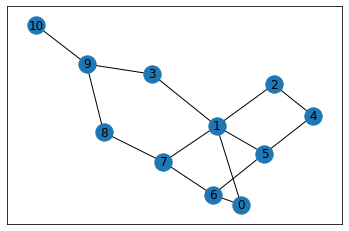

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx

edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
		(1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
		(8, 9), (7, 8), (1, 7), (3, 9)]

goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

In [ ]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
	print(point)
	if point[1] == goal:
		M[point] = 100
	else:
		M[point] = 0

	if point[0] == goal:
		M[point[::-1]] = 100
	else:
		M[point[::-1]]= 0
		# reverse of point

M[goal, goal]= 100
print(M)
# add goal point round trip

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
  
gamma = 0.75
# learning parameter
initial_state = 1
  
# Determines the available actions for a given state
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action
  
available_action = available_actions(initial_state)
  
# Chooses one of the available actions at random
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action
  
  
action = sample_next_action(available_action)
  
def update(current_state, action, gamma):
  
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)
# Updates the Q-Matrix according to the path chosen
  
update(initial_state, action, gamma)


0

Most efficient path:
[0, 1, 3, 9, 10]


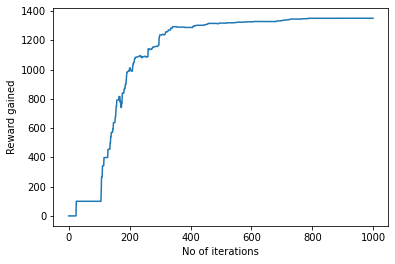

In [ ]:
scores = []
for i in range(1000):
	current_state = np.random.randint(0, int(Q.shape[0]))
	available_action = available_actions(current_state)
	action = sample_next_action(available_action)
	score = update(current_state, action, gamma)
	scores.append(score)

# print("Trained Q matrix:")
# print(Q / np.max(Q)*100)
# You can uncomment the above two lines to view the trained Q matrix

# Testing
current_state = 0
steps = [current_state]

while current_state != 10:

	next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
	if next_step_index.shape[0] > 1:
		next_step_index = int(np.random.choice(next_step_index, size = 1))
	else:
		next_step_index = int(next_step_index)
	steps.append(next_step_index)
	current_state = next_step_index

print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()


#Guassian Distribution


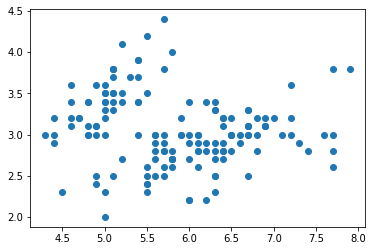

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# load the iris dataset
iris = datasets.load_iris()

# select first two columns
X = iris.data[:, :2]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])

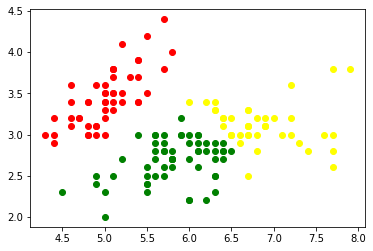

In [ ]:
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')


In [ ]:
# print the converged log-likelihood value
print(gmm.lower_bound_)

# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

-1.4987505566235162
8


Markov Decision

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class ValueIteration:
    def __init__(self, reward_function, transition_model, gamma):
        self.num_states = transition_model.shape[0]
        self.num_actions = transition_model.shape[1]
        self.reward_function = np.nan_to_num(reward_function)
        self.transition_model = transition_model
        self.gamma = gamma
        self.values = np.zeros(self.num_states)
        self.policy = None

    def one_iteration(self):
        delta = 0
        for s in range(self.num_states):
            temp = self.values[s]
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = self.reward_function[s] + self.gamma * np.sum(p * self.values)

            self.values[s] = max(v_list)
            delta = max(delta, abs(temp - self.values[s]))
        return delta

    def get_policy(self):
        pi = np.ones(self.num_states) * -1
        for s in range(self.num_states):
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = self.reward_function[s] + self.gamma * np.sum(p * self.values)

            max_index = []
            max_val = np.max(v_list)
            for a in range(self.num_actions):
                if v_list[a] == max_val:
                    max_index.append(a)
            pi[s] = np.random.choice(max_index)
        return pi.astype(int)

    def train(self, tol=1e-3):
        epoch = 0
        delta = self.one_iteration()
        delta_history = [delta]
        while delta > tol:
            epoch += 1
            delta = self.one_iteration()
            delta_history.append(delta)
            if delta < tol:
                break
        self.policy = self.get_policy()

        print(f'# iterations of policy improvement: {len(delta_history)}')
        print(f'delta = {delta_history}')

        fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=200)
        ax.plot(np.arange(len(delta_history)) + 1, delta_history, marker='o', markersize=4,
                alpha=0.7, color='#2ca02c', label=r'$\gamma= $' + f'{self.gamma}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Delta')
        ax.legend()
        plt.tight_layout()
        plt.show()


#Genetic Algorithm


In [1]:


import random


POPULATION_SIZE = 100

GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

TARGET = "I love GeeksforGeeks"

class Individual(object):

	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):

		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):	

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1

	
	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()


Generation: 1	String: . RAbpe83C)b}o]c _c;	Fitness: 18
Generation: 2	String: EZK 0D GSjHGM@r9ibQW	Fitness: 17
Generation: 3	String: rZl?UD GnjHpMlrPij$W	Fitness: 16
Generation: 4	String: rZl?UD GnjHpMlrPij$W	Fitness: 16
Generation: 5	String: rZl?UD GnjHpMlrPij$W	Fitness: 16
Generation: 6	String: ;bKAPb 
d_k=qorGYe
8	Fitness: 14
Generation: 7	String: ;bKAPb 
d_k=qorGYe
8	Fitness: 14
Generation: 8	String: ;bKAPb 
d_k=qorGYe
8	Fitness: 14
Generation: 9	String: HKl(ve GVVkbXlr0l!{s	Fitness: 12
Generation: 10	String: HKl(ve GVVkbXlr0l!{s	Fitness: 12
Generation: 11	String: sKl(ve GVVkbXor0 #{s	Fitness: 11
Generation: 12	String: sKl(ve GVVkbXor0 #{s	Fitness: 11
Generation: 13	String: #ClOMe G-0k9fo@G7eEs	Fitness: 10
Generation: 14	String: r lOve GV6kbCor0Heqs	Fitness: 9
Generation: 15	String: n lU0e GsNkbforG%e
s	Fitness: 8
Generation: 16	String: n lU0e GsNkbforG%e
s	Fitness: 8
Generation: 17	String: n lU0e GsNkbforG%e
s	Fitness: 8
Generation: 18	String: H lo9) GVVkQforG eks	Fitness: 7
Genera

# **Linear Regression**

Estimated coefficients:
b_0 = 1.2363636363636363  \  
b_1 = 1.1696969696969697


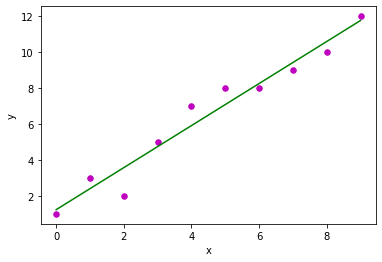

In [3]:
import numpy as np 

import matplotlib.pyplot as plt 

  

def estimate_coef(x, y): 

    # number of observations/points 

    n = np.size(x) 

  

    # mean of x and y vector 

    m_x = np.mean(x) 

    m_y = np.mean(y) 

  

    # calculating cross-deviation and deviation about x 

    SS_xy = np.sum(y*x) - n*m_y*m_x 

    SS_xx = np.sum(x*x) - n*m_x*m_x 

  

    # calculating regression coefficients 

    b_1 = SS_xy / SS_xx 

    b_0 = m_y - b_1*m_x 

  

    return (b_0, b_1) 

  

def plot_regression_line(x, y, b): 

    # plotting the actual points as scatter plot 

    plt.scatter(x, y, color = "m", 

               marker = "o", s = 30) 

  

    # predicted response vector 

    y_pred = b[0] + b[1]*x 

  

    # plotting the regression line 

    plt.plot(x, y_pred, color = "g") 

  

    # putting labels 

    plt.xlabel('x') 

    plt.ylabel('y') 

  

    # function to show plot 

    plt.show() 

  

def main(): 

    # observations / data 

    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

  

    # estimating coefficients 

    b = estimate_coef(x, y) 

    print("Estimated coefficients:\nb_0 = {}  \  \nb_1 = {}".format(b[0], b[1])) 

  

    # plotting regression line 

    plot_regression_line(x, y, b) 

  

if __name__ == "__main__": 

    main() 

In [7]:
import numpy
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X,y)
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


# Markov Decision Processes

# Policy Improvement Algorithm

In [ ]:
import numpy as np

class MDP:
    def __init__(self, markov_chains, rewards, actions, states):
        self.m = len(states)
        self.states = states
        self.actions = actions
        expected_reward = []
        for action in actions:
            e = []
            for i in range(self.m):
                e.append(sum( [rewards[action][i][j] * markov_chains[action][i][j] for j in range(self.m)]) )
            expected_reward.append(e)
        self.expected_reward = np.array(expected_reward)
        self.markov_chains = markov_chains
        self.iteration_count = 0
        


    def policy_iteration(self, A):
        self.iteration_count += 1
        r, V = [], []
        for state in states:# for each state i...
            r.append( -self.expected_reward[A[state]][state] ) # rewards[A[i]][i, A[i]] 
            V.append( [markov_chains[A[state]][state, j] for j in states[:-1]] )
        V = np.array(V)  
        r = np.array(r)    
        X = np.zeros((self.m, self.m))
        for i in range(self.m): 
            X[i, -1] = -1
            X[i,  i] = -1
            for j in states[:-1]:
                X[i, j] += V[i, j]
        V = np.linalg.solve(X, r)
        lambda_ = V[-1]
        T = []
        for state in states:
            t=[]
            for action in actions:
                VP = sum( [markov_chains[action][state, j] * V[j] for j in states[:-1]] )
                t.append( self.expected_reward[action][state] + VP ) # rewards[A[state]][state, action]
            T.append(t)
        improved_policy = []
        for i in states:
            improved_policy.append( T[i].index(max(T[i])) )
        return improved_policy, lambda_
    
    def iterate(self, A):
        A1, lmbd = self.policy_iteration(A)
        while (A != A1):
            print('\n\nNew policy: '+str(A1)+' (iteration '+str(self.iteration_count)+')\n\n')
            A = A1
            A1, lmbd = self.policy_iteration(A)
        return A, lmbd

In [ ]:
actions = {0, 1}# hard, soft
states  = [0, 1,2]# 1st serve, 2nd serve, In
P1 = np.array([[0, 3/4, 1/4],
               [3/4, 0, 1/4],
               [1,0,0]])
P2 = np.array([[0, 1/5, 4/5],
               [1/5,0, 4/5],
               [1,0,0]])
R1 = np.array([[0, 0, 0],
               [-1, 0, 0],
               [1/3, 0, 0]])
R2 = np.array([[0, 0, 0],
               [-1, 0, 0],
               [0, 0, 0]])
rewards = { 0: R1, 1: R2}
markov_chains = { 0: P1, 1: P2}
initial_policy = [0, 0, 0]# In state 0, do action 0. In state 1, do action 0.  In state 2, do action 0. 

mdp_Q83 = MDP(markov_chains, rewards, actions, states)
final_policy_Q83, lmbd = mdp_Q83.iterate(initial_policy)
print(final_policy_Q83)
print("Long run expected reward: "+str(lmbd))



New policy: [1, 1, 0] (iteration 1)


[1, 1, 0]
Long run expected reward: 0.12962962962962962


# **Principal Compoenent Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']

# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'target']

#Standardising features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['target']]],axis=1)

In [ ]:
finaldf.head()

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


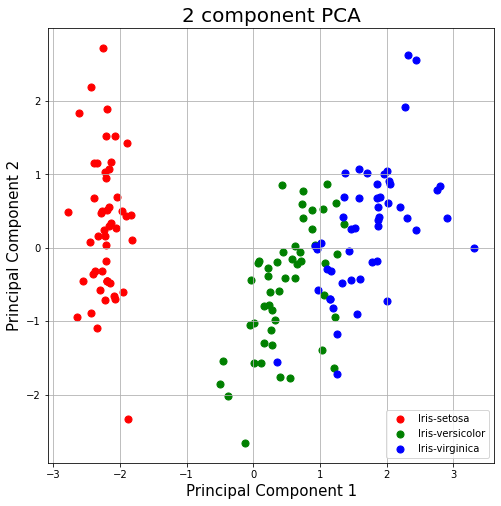

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# **Linear Discriminant Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

In [ ]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values) 

In [ ]:
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)

In [ ]:
S_W

array([[1.1672, 0.783 , 0.3461, 0.1839],
       [0.783 , 1.8616, 0.2181, 0.3051],
       [0.3461, 0.2181, 0.1796, 0.0954],
       [0.1839, 0.3051, 0.0954, 0.2178]])

In [ ]:
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

In [ ]:
S_B

array([[ 92.8059, -54.7706, 113.8033, 113.6835],
       [-54.7706,  58.7821, -73.7624, -68.4292],
       [113.8033, -73.7624, 141.1978, 139.7382],
       [113.6835, -68.4292, 139.7382, 139.3254]])

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1581.3259321867617
13.600776328162286
3.3265872147990916e-13
1.1756128328316217e-13


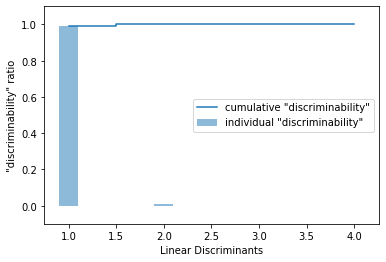

In [ ]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [ ]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)

In [ ]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.790936,-0.115414,0
1,-1.583202,0.265463,0
2,-1.663881,0.083657,0
3,-1.514646,0.225901,0
4,-1.807076,-0.189973,0


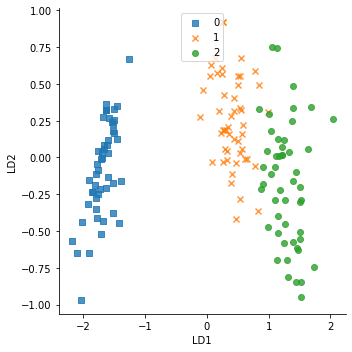

In [ ]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)

In [ ]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.084953,0.328454,0
1,7.147163,-0.755473,0
2,7.511378,-0.238078,0
3,6.837676,-0.642885,0
4,8.157814,0.540639,0


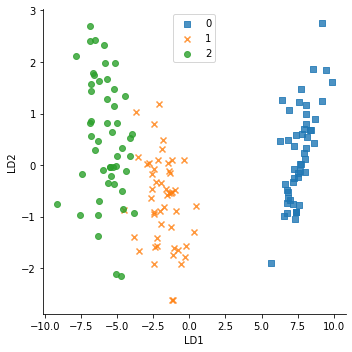

In [ ]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()

# **Support** **Vectors** 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
target_names = ['', 'M', 'B']
df['attack_type'] = df.Class.apply(lambda x: target_names[x])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,M


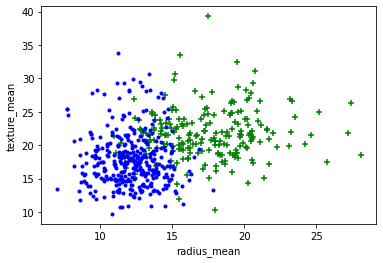

In [ ]:
df1 = df[df.Class == 1]
df2 = df[df.Class == 2]
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='green', marker='+')
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='blue', marker='.')

In [ ]:
X = df.drop(['Class', 'attack_type'], axis='columns')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y=df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train))
print(len(X_test))


398
171


In [ ]:
model = SVC(kernel = 'linear')


In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 2 2 1 2 2 2 2 2 1 1 2 2 2 2
 2 1 2 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 2 1 2
 2 1 2 2 1 1 2 1 1 2 1 2 2 2 1 1 2 1 1 1 2 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 2 2]


In [ ]:
percentage = model.score(X_test, y_test)
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[ 54   4]
 [  1 112]]
Test Set: 171
Accuracy = 97.07602339181285 %


In [8]:
import numpy as np
from scipy import random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt